In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import coordinates as coord
import astropy.units as u
import ligo.skymap.plot
import gbmgeometry as gbmg
%matplotlib inline
import h5py
import os
import numpy as np
import pandas as pd
envpath = os.environ.get('SIMULATOR')
simname = "TenOneH4Det"
gpname = "gp1"
simpath=envpath+"/"+simname+"_Files/"
file=h5py.File(simpath+simname+".hdf5","r")
fisher=file["/grid/"+gpname+"/fisher"]
gptruepos=file["/grid/"+gpname].attrs["True Position"]
gptruepossc = SkyCoord(gptruepos[0]*u.degree,gptruepos[1]*u.degree)

In [2]:
flist=[]
fname=[]
for f in fisher:
    flist.append(fisher[f].attrs['Position'])
    fname.append(f)
flist=np.transpose(flist)

In [3]:
fig =plt.figure(figsize=(10,10),dpi=400)

<Figure size 4000x4000 with 0 Axes>

In [4]:
pos = gbmg.PositionInterpolator(trigdat="/home/niklasvm/Envs/Plot/rawdata/glg_trigdat_all_bn131229277_v02.fit")
time=0
sc=pos.sc_pos(time)
sq=pos.quaternion(time)


In [17]:
im=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/tenH.npy")
xmin=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/tenxmin.npy")
xmax=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/tenxmax.npy")
ymin=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/tenymin.npy")
ymax=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/tenymax.npy")

In [5]:
fermi=gbmg.GBM(sq,sc_pos=sc)

In [10]:
n6=fermi.n6.get_fov(10)
n8=fermi.n8.get_fov(10)
n7=fermi.n7.get_fov(10)

In [10]:
center=fermi.n6.center

In [105]:
fermi.n4.center.icrs.ra.degree

<SkyCoord (ICRS): (ra, dec) in deg
    (289.13825547, 5.38341486)>

/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/core.py:260: UserWarning: The following kwargs were not used by contour: 'shade'
  cset = super().contourf(*args, **kwargs)
/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]


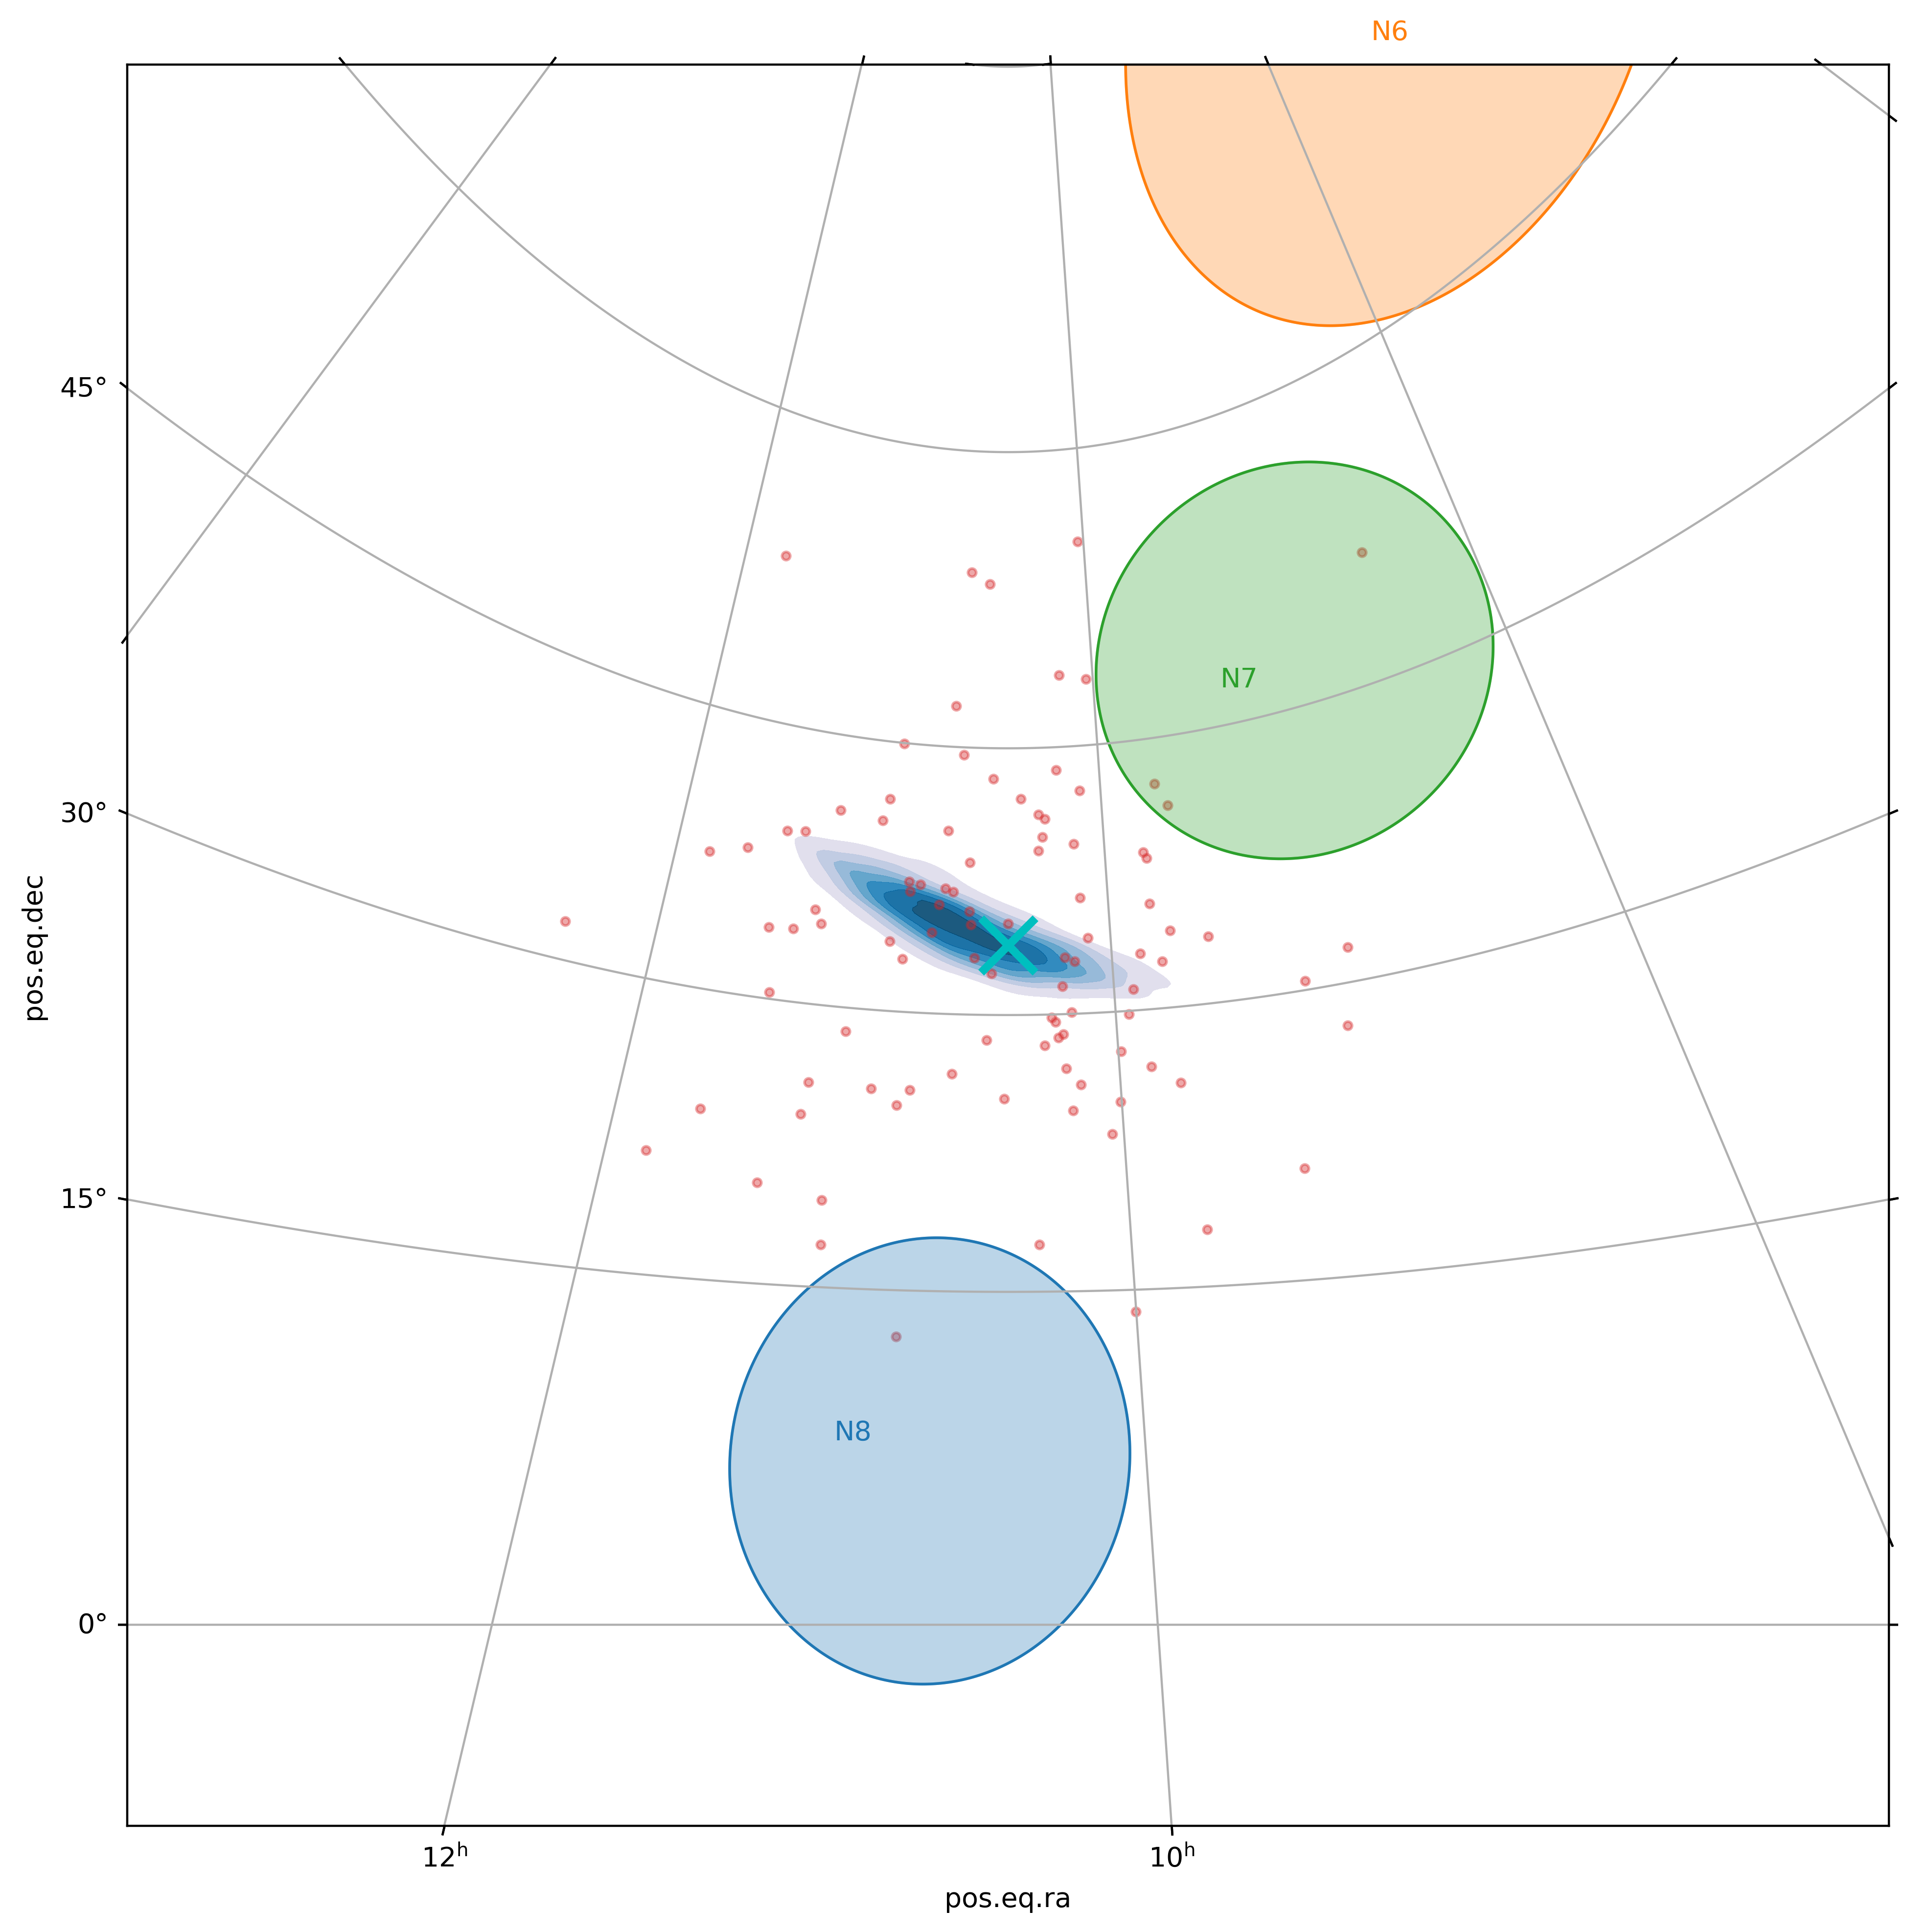

In [18]:
fig =plt.figure(figsize=(10,10),dpi=400)
ax=plt.axes([0.05,0.05,0.9,0.9],projection="astro zoom",center=gptruepossc,radius=50*u.degree)
ax.grid()
ax.plot(gptruepossc.ra,gptruepossc.dec,marker=ligo.skymap.plot.reticle(inner=0,angle=45),markersize=20,markeredgewidth=3,color='c',transform=ax.get_transform('world'))
ax.fill(n8[0],n8[1],transform=ax.get_transform('world'),alpha=0.3,color='#1f77b4')
ax.fill(n8[0],n8[1],transform=ax.get_transform('world'),fill=False,color='#1f77b4')
ax.fill(n6[0],n6[1],transform=ax.get_transform('world'),alpha=0.3,color='#ff7f0e')
ax.fill(n6[0],n6[1],transform=ax.get_transform('world'),fill=False,color='#ff7f0e')
ax.fill(n7[0],n7[1],transform=ax.get_transform('world'),alpha=0.3,color='#2ca02c')
ax.fill(n7[0],n7[1],transform=ax.get_transform('world'),fill=False,color='#2ca02c')
#ax.contour(H,extent=[xe[0],xe[-1],ye[0],ye[-1]],transform=ax.get_transform('world'))
con=plt.contourf(im,extent=[xmin,xmax,ymin,ymax],cmap="PuBu",shade=True,transform=ax.get_transform('world'))
con.set_alpha(0.9)
con.collections[0].set_alpha(0)
ax.scatter(flist[0],flist[1],transform=ax.get_transform('world'),alpha=0.4,color='#d62728',marker='.')
ax.annotate("N6",(fermi.n6.center.icrs.ra.degree,fermi.n6.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#ff7f0e')
ax.annotate("N8",(fermi.n8.center.icrs.ra.degree+5,fermi.n8.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#1f77b4')
ax.annotate("N7",(fermi.n7.center.icrs.ra.degree+5,fermi.n7.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#2ca02c')
#for i,f in enumerate(fisher):
  #  if f in dist10['name'].to_numpy():
    #    ax.annotate(str(f),(flist[0][i],flist[1][i]),xycoords=ax.get_transform('world'))
plt.savefig("erroneous_loca")
plt.show()

In [16]:
center=SkyCoord(ra=260*u.degree,dec=7*u.degree,frame='icrs')

In [58]:
center.icrs.ra.deg

342.645420194876

In [76]:
sccord=SkyCoord(ra=testn2[0]*u.degree,dec=testn2[1]*u.degree,frame='icrs')

In [63]:
ls={}
ls["name"]=[]
ls["distance"]=[]
for i,f in enumerate(fisher):
    pos=fisher[f].attrs["Position"]
    possc=SkyCoord(pos[0]*u.degree,pos[1]*u.degree)
    dl=fermi.detectors['n4'].get_center().separation(possc)
    ls["name"].append(f)
    ls["distance"].append(dl.degree)
df=pd.DataFrame.from_dict(ls)   
dist10=df.query("55<=distance<=57")

In [66]:
dist10['name'].to_numpy()

array(['f104', 'f127', 'f135', 'f140', 'f150', 'f164', 'f188', 'f195',
       'f197', 'f30', 'f34', 'f35', 'f4', 'f67', 'f71'], dtype=object)

In [87]:
H

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [92]:
np.max(H)

40.0

In [9]:
file["grid/gp1/(0,0)"].attrs["SelectedDetectors"]

array([b'n6', b'n8', b'n7', b'b1'], dtype='|S2')

In [11]:
gptruepossc

<SkyCoord (ICRS): (ra, dec) in deg
    (157.01487668, 33.95838294)>